## K-Means Clustering Algorithm

Find dominant color in an image

K Means Clustering

A un-supervised clustering algorithm so no target present, we make clusters/groups with this


Say we want to divide in two cluster so take two points randomly and draw its perpendicular bisector.

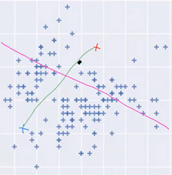

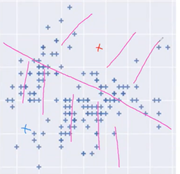

this was one iteration


Now it moves the centers chosen to the centroid of the points or towards more swarm density in that cluster, again those which are closer to x1 are grouped with it and rest with x2.

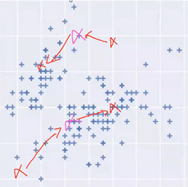

It can also be understood as initially it groups points randomly then calculates their centroid/mean, calc distances of points from those centers, whichever is closer to whichever point is grouped with it. Again iterate


After some time the centers stop moving, that can be considered as stopping point.	 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [2]:
img = plt.imread("/content/scene.jpg")  # saved in rgb fashion

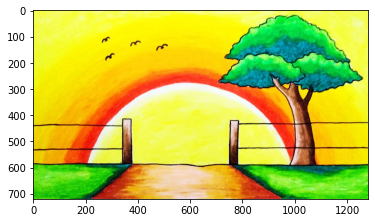

In [3]:
plt.imshow(img)
plt.show()

In [5]:
img.shape, type(img)

((720, 1280, 3), numpy.ndarray)

In [10]:
# another way to import img
img1 = cv2.imread("/content/scene.jpg")   # BGR method need to convert to rgb

#plt.imshow(img1)
#plt.show()

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)


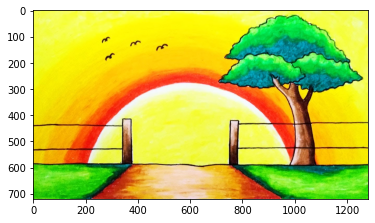

(numpy.ndarray, (720, 1280, 3))

In [12]:
plt.imshow(img1)
plt.show()
type(img1), img1.shape

### K MEANS Implementation with sickit learn

In [13]:
# first need 1D array of image for sickit learn
# last arg in shape (3) is the channels R,G,B 
# so will have to convert them also into separate
all_pixel = img.reshape(720*1280, 3)
all_pixel.shape

(921600, 3)

In [14]:
from sklearn.cluster import KMeans

In [15]:
km = KMeans(n_clusters=2, n_jobs=-1)   # max_iter : int, default=300
#  n_jobs=-1 is using all the threads

In [16]:
km.fit(all_pixel)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
center = km.cluster_centers_
center

array([[242.54864946, 213.21385637,  56.26456772],
       [ 40.96999914, 151.09396137,  50.61421455]])

In [19]:
# converting to integer
center = np.array(center, dtype=int)
center

array([[242, 213,  56],
       [ 40, 151,  50]])

In [21]:
km.labels_, km.labels_.shape, np.unique(km.labels_)

(array([0, 0, 0, ..., 1, 1, 1], dtype=int32),
 (921600,),
 array([0, 1], dtype=int32))

In [22]:
np.unique(km.labels_, return_counts=True)

(array([0, 1], dtype=int32), array([700439, 221161]))

In [26]:
new_img = np.zeros((all_pixel.shape[0], 3), dtype='uint') # + 200
# without +200 due to all 0s it was black, with it a little grey

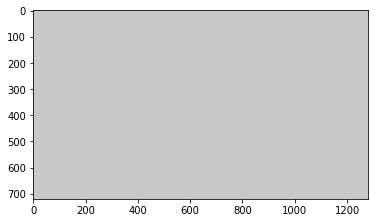

In [27]:
plt.imshow(new_img.reshape(720, 1280, 3))
plt.show()

In [28]:
new_img.shape

(921600, 3)

In [37]:

km.labels_[5]  #to see which center 
center[km.labels_[5]]   # seeing pixel value

array([242, 213,  56])

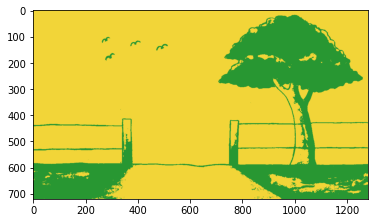

In [38]:
for i in range (new_img.shape[0]):
  new_img[i] = center[km.labels_[i]]

plt.imshow(new_img.reshape(720, 1280, 3))
plt.show()


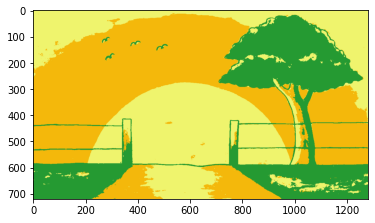

In [42]:
# trying with 3 clusters 
km3 = KMeans(n_clusters=3, n_jobs=-1)

km3.fit(all_pixel)

center3 = km3.cluster_centers_
center3 = np.array(center3, dtype=int)

new_img3 = np.zeros((all_pixel.shape[0], 3), dtype='uint')

for i in range(new_img3.shape[0]):
  new_img3[i] = center3[km3.labels_[i]]

plt.imshow(new_img3.reshape(720, 1280, 3))
plt.show()

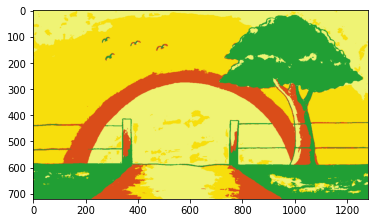

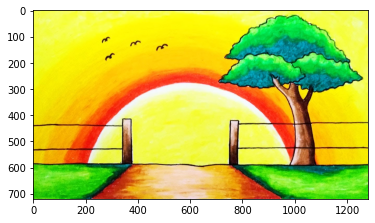

In [44]:
# trying with 4 clusters 
km4 = KMeans(n_clusters=4, n_jobs=-1)

km4.fit(all_pixel)

center4 = km4.cluster_centers_
center4 = np.array(center4, dtype=int)

new_img4 = np.zeros((all_pixel.shape[0], 3), dtype='uint')

for i in range(new_img4.shape[0]):
  new_img4[i] = center4[km4.labels_[i]]

plt.imshow(new_img4.reshape(720, 1280, 3))
plt.show()

plt.imshow(img1)
plt.show()

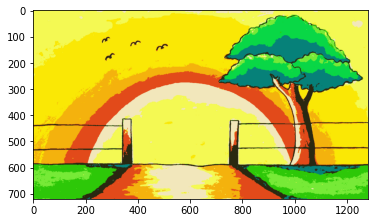

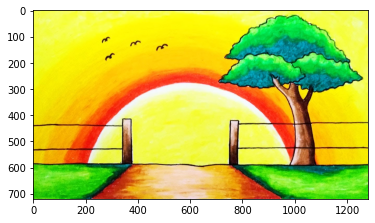

In [45]:
km10 = KMeans(n_clusters=10, n_jobs=-1)

km10.fit(all_pixel)

center10 = km10.cluster_centers_
center10 = np.array(center10, dtype=int)

new_img10 = np.zeros((all_pixel.shape[0], 3), dtype='uint')

for i in range(new_img10.shape[0]):
  new_img10[i] = center10[km10.labels_[i]]

plt.imshow(new_img10.reshape(720, 1280, 3))
plt.show()

plt.imshow(img1)
plt.show()

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


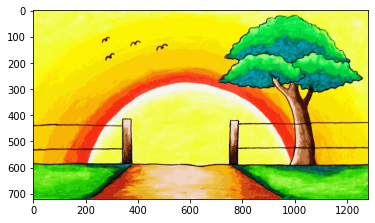

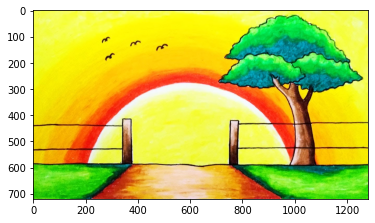

In [46]:
# mat karo ye sab
"""
km50 = KMeans(n_clusters=50, n_jobs=-1)

km50.fit(all_pixel)

center50 = km50.cluster_centers_
center50 = np.array(center50, dtype=int)

new_img50 = np.zeros((all_pixel.shape[0], 3), dtype='uint')

for i in range(new_img50.shape[0]):
  new_img50[i] = center50[km50.labels_[i]]

plt.imshow(new_img50.reshape(720, 1280, 3))
plt.show()

plt.imshow(img1)
plt.show()
"""